In [1]:
#Impory the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import pickle

In [2]:
#load data
originalDataset = pd.read_csv('news_articles.csv')
textData = originalDataset.iloc[:,10]
fakeOrReal = originalDataset.iloc[:,8]
fakeOrReal = fakeOrReal.replace(['Real'],1)
fakeOrReal = fakeOrReal.replace(['Fake'],0)
dataset = pd.concat([textData, fakeOrReal], axis=1, sort=False)
dataset = dataset.dropna(thresh=2)

In [3]:
#creating bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(dataset.iloc[:,0]).toarray()
y = dataset.iloc[:,-1]

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [5]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 75)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=75, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [6]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [7]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[237,   6],
       [ 57,  39]])

In [8]:
#Save file
filename = 'modelXX_randomForest.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [9]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)


0.8141592920353983


In [18]:
#move threshold
threshold = 0.425

predicted_proba = classifier.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

cm = confusion_matrix(y_test, predicted)
cm

array([[226,  17],
       [ 44,  52]])


Matriz de confusão
[[226  17]
 [ 44  52]]


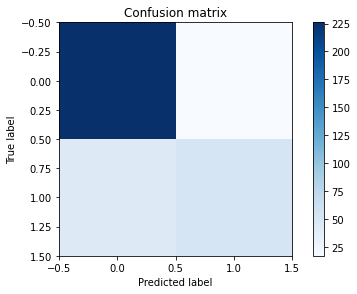

In [14]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show

cm = confusion_matrix(y_test, predicted)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('\nMatriz de confusão')
plt.figure()
plot_confusion_matrix(cm, title='Confusion matrix')
print(cm)
